# Principal Component Analysis (PCA)

<img src="https://miro.medium.com/max/2000/1*ba0XpZtJrgh7UpzWcIgZ1Q.jpeg" width=600px/>



# Why do we need PCA?

There are _lots_ of reasons, but two major ones are below.

* Consider a data set with many, many features. It might be computationally intensive to perform analysis on such a large data set, so instead we use PCA to extra the major contributions to the modeled output and analyze the components instead. **Benefit: less computationally intensive; quicker work**
* Consider a data set with a basis that has signifcant overlap between features. That is, it's hard to tell what's important and what isn't. PCA can produce a better basis with similar (sometimes the same) information for modeling. **Benefit: more meaningful features; more accurate models**

## Let's dive into the iris data set to see this

In [1]:
##imports
import numpy as np
import scipy.linalg
import sklearn.decomposition as dec
import sklearn.datasets as ds
import matplotlib.pyplot as plt
import pandas as pd

iris = ds.load_iris()
data = pd.DataFrame(iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
target = pd.DataFrame(iris.target, columns=['species'])

## Let's look at the data

(np.float64(4.0), np.float64(8.0), np.float64(2.0), np.float64(4.5))

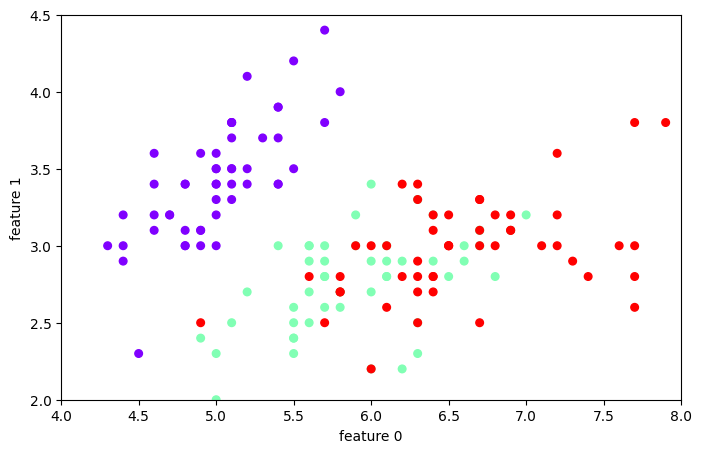

In [2]:
plt.figure(figsize=(8,5));
plt.scatter(data['sepal_length'],data['sepal_width'], c=target['species'], s=30, cmap=plt.cm.rainbow);
plt.xlabel('feature 0'); plt.ylabel('feature 1')
plt.axis([4, 8, 2, 4.5])

## Let's make a KNN classifier

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

train_features, test_features, train_labels, test_labels = train_test_split(data, 
                                                                            target['species'], 
                                                                            train_size = 0.75,
                                                                            random_state=3)
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(train_features, train_labels)

y_predict = neigh.predict(test_features)
print(confusion_matrix(test_labels, y_predict))
print(neigh.score(test_features, test_labels))

[[15  0  0]
 [ 0 10  2]
 [ 0  0 11]]
0.9473684210526315


## What happens if we use fewer features?

In [4]:
train_features, test_features, train_labels, test_labels = train_test_split(data.drop(columns=['petal_length','petal_width']), 
                                                                            target['species'], 
                                                                            train_size = 0.75,
                                                                            random_state=3)
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(train_features, train_labels)

y_predict = neigh.predict(test_features)
print(confusion_matrix(test_labels, y_predict))
print(neigh.score(test_features, test_labels))

[[14  1  0]
 [ 0  7  5]
 [ 0  7  4]]
0.6578947368421053


## Let's do a PCA to find the principal components

[4.22824171 0.24267075 0.0782095  0.02383509]


(np.float64(-4.0), np.float64(4.0), np.float64(-1.5), np.float64(1.5))

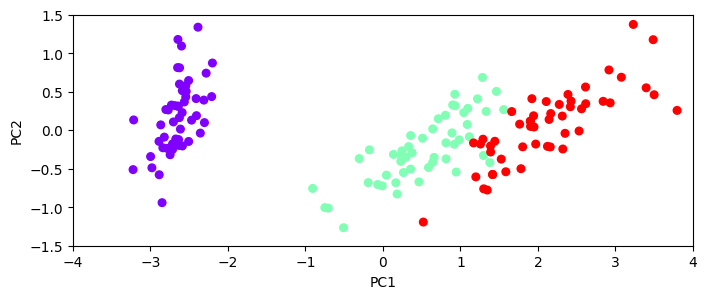

In [5]:
pca = dec.PCA()
pca_data = pca.fit_transform(data)
print(pca.explained_variance_)

pca_data = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3', 'PC4'])
plt.figure(figsize=(8,3));
plt.scatter(pca_data['PC1'], pca_data['PC2'], c=target['species'], s=30, cmap=plt.cm.rainbow);
plt.xlabel('PC1'); plt.ylabel('PC2')
plt.axis([-4, 4, -1.5, 1.5])

## Let's train a KNN model

In [6]:
train_features, test_features, train_labels, test_labels = train_test_split(pca_data, 
                                                                            target['species'], 
                                                                            train_size = 0.75,
                                                                            random_state=3)
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(train_features, train_labels)

y_predict = neigh.predict(test_features)
print(confusion_matrix(test_labels, y_predict))
print(neigh.score(test_features, test_labels))

[[15  0  0]
 [ 0 10  2]
 [ 0  0 11]]
0.9473684210526315


## Let's use only the first two principal components

In [7]:
train_features, test_features, train_labels, test_labels = train_test_split(pca_data.drop(columns=['PC3','PC4']), 
                                                                            target['species'], 
                                                                            train_size = 0.75,
                                                                            random_state=3)
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(train_features, train_labels)

y_predict = neigh.predict(test_features)
print(confusion_matrix(test_labels, y_predict))
print(neigh.score(test_features, test_labels))

[[15  0  0]
 [ 0 10  2]
 [ 0  0 11]]
0.9473684210526315


# Questions, Comments, Concerns?